In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dfd=pd.read_csv("../../KavliSP23/Python/input_data/donor_composition.csv")
dfr=pd.read_csv("../../KavliSP23/Python/input_data/remnant_composition.csv")

In [3]:
dfd['xn_ni56,'] = 0.0e0


In [4]:
index=dfd[0.7*dfd["mass,"].cumsum()/dfd["mass,"].sum()<=0.6609]

In [5]:
index

,"r_inner,","r_outer,","mass,","density,","l_z,","v_r,","u,","p,","T,","xn_n,",...,"xn_ti44,","xn_v47,","xn_cr48,","xn_mn51,","xn_fe52,","xn_fe54,","xn_co55,","xn_ni56,","xn_ni58,",xn_ni59
0,0.0,42458782.0,1.379065e+30,4301239.90,-8.138758e+13,-98510.425,9.990988e+16,2.445863e+23,139171350.0,1.000000e-30,...,4.400000e-29,4.700000e-29,4.800000e-29,5.100000e-29,5.200000e-29,5.400000e-29,5.500000e-29,0.0,5.800000e-29,5.900000e-29
1,42458782.0,53598152.0,1.379177e+30,4252160.70,-1.934666e+14,-164795.450,9.940054e+16,2.413494e+23,137575020.0,1.000000e-30,...,4.400000e-29,4.700000e-29,4.800000e-29,5.100000e-29,5.200000e-29,5.400000e-29,5.500000e-29,0.0,5.800000e-29,5.900000e-29
2,53598152.0,61414538.0,1.379142e+30,4239294.90,-2.758940e+14,-186609.740,9.901372e+16,2.389437e+23,135936590.0,1.000000e-30,...,4.400000e-29,4.700000e-29,4.800000e-29,5.100000e-29,5.200000e-29,5.400000e-29,5.500000e-29,0.0,5.800000e-29,5.900000e-29
3,61414538.0,67669185.0,1.379192e+30,4209102.60,-3.489473e+14,-205877.640,9.868015e+16,2.368245e+23,135211250.0,1.000000e-30,...,4.400000e-29,4.700000e-29,4.800000e-29,5.100000e-29,5.200000e-29,5.400000e-29,5.500000e-29,0.0,5.800000e-29,5.900000e-29
4,67669185.0,72953329.0,1.379257e+30,4199585.70,-4.111603e+14,-217539.080,9.838174e+16,2.349237e+23,134773940.0,1.000000e-30,...,4.400000e-29,4.700000e-29,4.800000e-29,5.100000e-29,5.200000e-29,5.400000e-29,5.500000e-29,0.0,5.800000e-29,5.900000e-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,712769090.0,714531680.0,1.379306e+30,122272.26,-3.307087e+16,-647375.310,1.455692e+16,1.190775e+21,37984150.0,9.894436e-31,...,4.404522e-29,4.648625e-29,4.747532e-29,5.044252e-29,5.143159e-29,5.340973e-29,5.439880e-29,0.0,5.736601e-29,5.835508e-29
940,714531680.0,716314310.0,1.379075e+30,120279.68,-3.330950e+16,-595394.160,1.460370e+16,1.189549e+21,38103485.0,9.891945e-31,...,4.411911e-29,4.646754e-29,4.745622e-29,5.042223e-29,5.141090e-29,5.338824e-29,5.437691e-29,0.0,5.734293e-29,5.833160e-29
941,716314310.0,718125860.0,1.379236e+30,117780.37,-3.357576e+16,-535019.540,1.439386e+16,1.116921e+21,38015856.0,9.898332e-31,...,4.417077e-29,4.648627e-29,4.747534e-29,5.044254e-29,5.143161e-29,5.340975e-29,5.439882e-29,0.0,5.736603e-29,5.835510e-29
942,718125860.0,719984840.0,1.379100e+30,114178.63,-3.396826e+16,-601147.130,1.426021e+16,1.087552e+21,37891198.0,9.906046e-31,...,4.429899e-29,4.652740e-29,4.751735e-29,5.048718e-29,5.147713e-29,5.345702e-29,5.444696e-29,0.0,5.741680e-29,5.840674e-29


In [6]:
columns_to_plot = [  'xn_he4,', 'xn_c12,', 'xn_o16,', 'xn_ne20,', 'xn_si28,', 'xn_ni56,']

/home/bhat/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


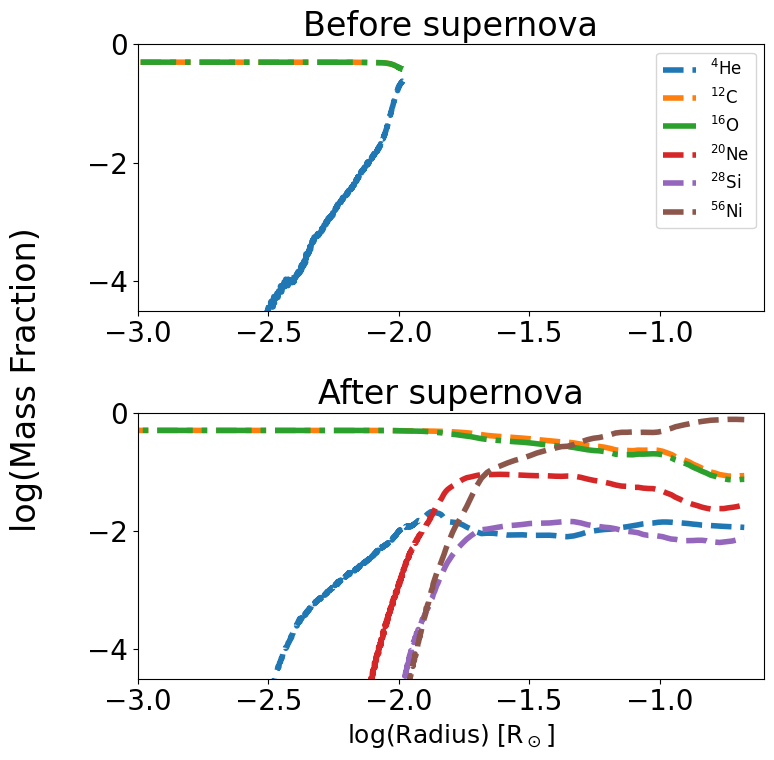

In [21]:

num_columns = len(dfd[columns_to_plot].columns[:-1])  # Exclude the X-axis column
#print(num_columns)
plt.rcParams["font.size"]=20
plt.rcParams["legend.fontsize"]=12
plt.rcParams['lines.linestyle']="--"
plt.rcParams['lines.linewidth']=4
plt.rcParams["axes.labelsize"]=18
fig,ax=plt.subplots(2,1,figsize=(8,8))
for i, column in enumerate(dfd[columns_to_plot].columns[:]):
    if max(dfr[column])>1.0*np.power(10,(-4.5)) :
        if column=="xn_o16,":
            plt.rcParams['lines.linestyle']="-."
        else: plt.rcParams['lines.linestyle']="--"


        ax[0].plot(np.log10(index["r_outer,"]/69600000000), np.log10(index[column]), label=column[3:-1])
        ax[1].plot(np.log10(dfr["r_outer,"]/69600000000), np.log10(dfr[column]), label=column)

    
plt.xlabel("log(Radius) [R$_ \odot$]")
fig.supylabel("log(Mass Fraction)")
#ax[0].legend(loc='lower left')#, bbox_to_anchor=(1, 0.5))
ax[0].legend(["$^4$He","$^{12}$C","$^{16}$O","$^{20}$Ne","$^{28}$Si","$^{56}$Ni"],loc='best')#, bbox_to_anchor=(1, 0.5))

ax[0].set_ylim(-4.5,0)
ax[1].set_ylim(-4.5,0)
ax[0].set_xlim(-3,-0.6)
ax[1].set_xlim(-3,-0.6)
ax[0].set_title("Before supernova")
ax[1].set_title("After supernova")

plt.xlim()
plt.tight_layout()
plt.savefig('../Plots/plots_paper/comparison_composition.pdf',bbox_inches="tight")
plt.savefig('../Plots/plots_paper/comparison_composition.png')


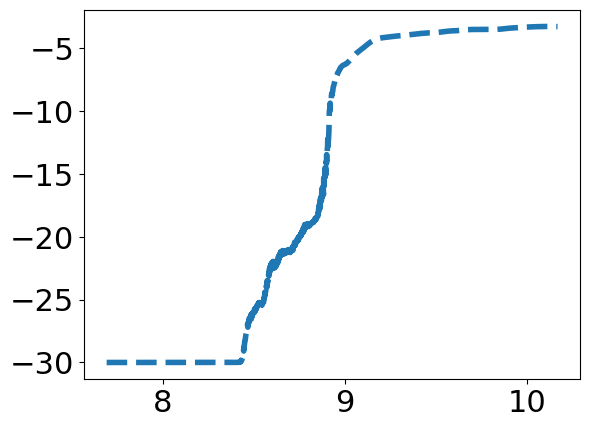

In [14]:
plt.plot(np.log10(dfr["r_outer,"]), np.log10(dfr["xn_p,"]))
